In [28]:
import matplotlib.pyplot as plt
import osmnx as ox
from osmnx.simplification import simplify_graph
import networkx as nx
import random

In [13]:
lat1, lon1 = 35.71643109802673, 51.34974663404765
lat2, lon2 = 35.712445786680625, 51.35525105737604

graph = ox.graph_from_bbox((lon1, lat2, lon2, lat1), simplify=False)
simplified_graph = simplify_graph(graph)

In [40]:
# Color Settings
BG_COLOR = (0,0,0)
NODE_COLOR = "w"
EDGE_COLORS = ["g", "b", "r","c"]

# Size
NODE_SIZE= 15
EDGE_LW = 3
 


In [41]:
def assign_edge_colors(graph, colors):
    """
    Assigns random colors to the edges of a NetworkX graph.

    Args:
        graph (nx.Graph): The input NetworkX graph.
        colors (list): The list of colors to select from.

    Returns:
        list: A list of colors, one for each edge in the graph.
    """

    edge_colors = []

    for u, v in graph.edges():
        color = random.choice(colors)
        # graph[u][v]['color'] = color  # Assign color as edge attribute
        edge_colors.append(color)

    return edge_colors

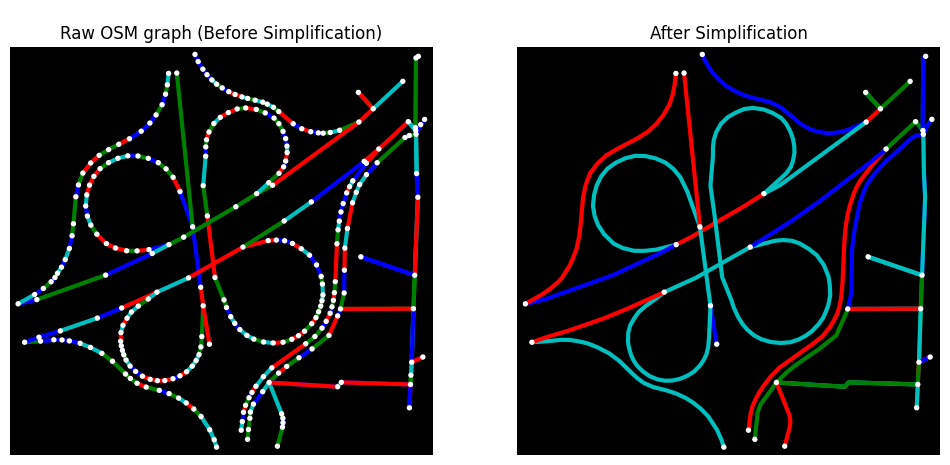

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7))

for ax in axes:
    ax.set_facecolor(BG_COLOR)

graph_edge_colors = assign_edge_colors(graph, EDGE_COLORS)
simplified_graph_edge_colors = assign_edge_colors(simplified_graph, EDGE_COLORS)

fig, axes[0] = ox.plot_graph(graph, ax=axes[0], edge_color=graph_edge_colors, node_color=NODE_COLOR, node_size=NODE_SIZE, edge_linewidth=EDGE_LW, close=False, show=False) 
fig, axes[1] = ox.plot_graph(simplified_graph, ax=axes[1], edge_color=simplified_graph_edge_colors, node_color=NODE_COLOR, node_size=NODE_SIZE, edge_linewidth=EDGE_LW, close=False, show=False)

axes[0].set_title("Raw OSM graph (Before Simplification)")
axes[1].set_title("After Simplification")
plt.show() 